<a href="https://colab.research.google.com/github/Ruhi02/EDA-on-Superstore-Sales-data-from-Kaggle/blob/main/EDA_on_Superstore_Sales_Data_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Analysis on Sample Super Store Training Dataset
#Perform ‘Exploratory Data Analysis’ on the provided dataset ‘Sample Super Store data.’ 
#Suppose you are the business owner of the retail firm and want to see how your company is performing. 
#You are interested in finding out the weak areas where you can work to make more profit.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
sns.set(style='darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Data Collection
Obtaining, gathering, and measuring the necessary and targeted data from available internal or external 
data sources is the first stage in a data science and business analytics task, which is subsequently 
compiled into an established system. The Sample Superstore dataset is used in this scenario.

# Loading Data

In [ ]:
df = pd.read_excel('D:/SICSR MBA SEM 2/Business Intelligence/SuperstoreSalesTraining.xlsx')

In [ ]:
df['year'] = pd.DatetimeIndex(df['Order Date']).year

# Data Exploration
#information about dataset

In [ ]:
# display the number of entries, the number and names of the column attributes, the data type and
    # digit placings, and the memory space used

df.info()               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13442 entries, 0 to 13441
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order ID             13442 non-null  int64         
 1   Order Priority       13442 non-null  object        
 2   Order Date           13442 non-null  datetime64[ns]
 3   Discount             13442 non-null  float64       
 4   Unit Price           13442 non-null  int64         
 5   Order Quantity       13442 non-null  int64         
 6   Sales                13442 non-null  float64       
 7   Profit               13442 non-null  float64       
 8   Shipping Cost        13442 non-null  int64         
 9   Product Base Margin  13442 non-null  float64       
 10  Department           13442 non-null  object        
 11  Container            13442 non-null  object        
 12  Category             13442 non-null  object        
 13  Item                 13442 non-

# Data preprocessing 
Data preprocessing is a data mining approach for converting unstructured data into a usable format. Data cleansing, data integration, data transformation, and data reduction are the four primary stages of this process.

To ensure quality data and analysis outcomes, data cleaning will filter, detect, and treat unclean data. There may be noise in the form of impossible and extreme numbers, outliers, and missing values in this scenario. Inconsistent data and duplicated properties and data are examples of mistakes.

The dataset contains 9994 rows of records and  columns of attributes. The data types of the attributes consist of 12 qualitative discrete categorical, 2 quantitative discrete numerical integer, and 7 quantitative continuous numerical float with 64 digit placings.
Data type is correct and matches the corresponding values.

The memory space usage is at least 2.8+ MB.

Through this, it is found that there are 3 unnamed Columns present in the dataset.

# Data Cleaning
Before we start with the analysis, we must first clean the data or “scrub the dirt”.
For this analysis, we will look at the more common issues such as missing and duplicate data.

# Check for unnecessary columns and drop them if not required

In [ ]:
df = df.drop(['Unnamed: 23','Unnamed: 24','Unnamed: 25'],axis=1)

For the next step, unique() is used to check qualitative data for noises of impossible values such as 
incorrect mispelt data entries, or errors of inconsistent data such as not comparable numerical measurement
formats and data types.

In [ ]:
# display unique categories for qualitative attributes
catagorical_features = [i for i in df.columns if df.dtypes[i] == 'object']
for j in catagorical_features:
    print(j)
    print(sorted(df[j].unique())) # sort in alphabetical order

Order Priority
['Critical', 'High', 'Low', 'Medium', 'Not Specified']
Department
['Furniture', 'Office Supplies', 'Technology']
Container
['Jumbo Box', 'Jumbo Drum', 'Large Box', 'Medium Box', 'Small Box', 'Small Pack', 'Wrap Bag']
Category
['Appliances', 'Binders and Binder Accessories', 'Bookcases', 'Chairs & Chairmats', 'Computer Peripherals', 'Copiers and Fax', 'Envelopes', 'Labels', 'Office Furnishings', 'Office Machines', 'Paper', 'Pens & Art Supplies', 'Rubber Bands', 'Scissors, Rulers and Trimmers', 'Storage & Organization', 'Tables', 'Telephones and Communication']
Item
['"While you Were Out" Message Book, One Form per Page', '#10 Self-Seal White Envelopes', '#10 White Business Envelopes,4 1/8 x 9 1/2', '#10- 4 1/8" x 9 1/2" Recycled Envelopes', '#10- 4 1/8" x 9 1/2" Security-Tint Envelopes', '#10-4 1/8" x 9 1/2" Premium Diagonal Seam Envelopes', '#6 3/4 Gummed Flap White Envelopes', '*Staples* Highlighting Markers', '*Staples* Letter Opener', '*Staples* Packaging Labels', '*S

# Observation-
Through this, it is found that there are no noises of impossible values or errors of inconsistent values.
In relation to the unique values, their count can be computed.

# Showing the top 5 rows

In [ ]:
df.head()

,Order ID,Order Priority,Order Date,Discount,Unit Price,Order Quantity,Sales,Profit,Shipping Cost,Product Base Margin,...,Customer Segment,Customer_ID,Customer Name,Region,State,Country,City,Ship Date,Ship Mode,year
0,4132,Not Specified,2012-05-28,0.01,3,8,23.76,7.40,1,0.36,...,Corporate,1,Maurice Lang,AsiaPac,Sindh,Pakistan,Karachi,2012-05-30,Regular Air,2012
1,20513,High,2013-07-07,0.01,3,18,53.46,27.62,1,0.54,...,Corporate,1,Maurice Lang,AsiaPac,Sindh,Pakistan,Karachi,2013-07-08,Express Air,2013
2,36262,Not Specified,2011-07-27,0.00,206,31,6386.00,3764.74,3,0.59,...,Corporate,1,Maurice Lang,AsiaPac,Sindh,Pakistan,Karachi,2011-07-27,Express Air,2011
3,36262,Not Specified,2011-07-27,0.03,7,28,190.12,60.64,6,0.37,...,Corporate,1,Maurice Lang,AsiaPac,Sindh,Pakistan,Karachi,2011-07-28,Express Air,2011
4,36262,Not Specified,2011-07-27,0.01,6,28,166.32,88.40,4,0.56,...,Corporate,1,Maurice Lang,AsiaPac,Sindh,Pakistan,Karachi,2011-07-28,Regular Air,2011


In [ ]:
# count of unique values
df.nunique()

Order ID               8983
Order Priority            5
Order Date             1422
Discount                 17
Unit Price              237
Order Quantity          147
Sales                  7197
Profit                 9942
Shipping Cost            86
Product Base Margin      61
Department                3
Container                 7
Category                 17
Item                   1233
Customer Segment          4
Customer_ID            2989
Customer Name          2989
Region                    4
State                   149
Country                  50
City                   1440
Ship Date              1456
Ship Mode                 3
year                      4
dtype: int64

# Showing last 5 rows of data set

In [ ]:
df.tail()

,Order ID,Order Priority,Order Date,Discount,Unit Price,Order Quantity,Sales,Profit,Shipping Cost,Product Base Margin,...,Customer Segment,Customer_ID,Customer Name,Region,State,Country,City,Ship Date,Ship Mode,year
13437,46212,Not Specified,2013-09-12,0.08,551,15,7603.8,5160.95,46,0.71,...,Consumer,3401,Dianne S Hanson,Latam,Minas Gerais,Brazil,Belo Horizonte,2013-09-14,Delivery Truck,2013
13438,46212,Not Specified,2013-09-12,0.09,8,90,655.2,205.80,3,0.38,...,Consumer,3401,Dianne S Hanson,Latam,Minas Gerais,Brazil,Belo Horizonte,2013-09-14,Express Air,2013
13439,56581,High,2013-02-08,0.10,106,20,1908.0,1152.00,14,0.65,...,Consumer,3401,Dianne S Hanson,Latam,Minas Gerais,Brazil,Belo Horizonte,2013-02-11,Express Air,2013
13440,87531,High,2011-04-12,0.95,213,10,106.5,-712.30,52,0.64,...,Consumer,3402,Frederick Cole,North America,West Virginia,United States of America,Charleston,2011-04-12,Delivery Truck,2011
13441,87530,High,2010-02-08,0.10,106,5,477.0,277.50,14,0.65,...,Consumer,3403,Tammy Buckley,North America,Wyoming,United States of America,Cheyenne,2010-02-11,Express Air,2010


# Shape of data set

In [ ]:
#Showing no of rows and coloumns
df.shape

(13442, 24)

# finding only coloumns


In [ ]:
df.columns

Index(['Order ID', 'Order Priority', 'Order Date', 'Discount', 'Unit Price',
       'Order Quantity', 'Sales', 'Profit', 'Shipping Cost',
       'Product Base Margin', 'Department', 'Container', 'Category', 'Item',
       'Customer Segment', 'Customer_ID', 'Customer Name', 'Region', 'State',
       'Country', 'City', 'Ship Date', 'Ship Mode', 'year'],
      dtype='object')

# Handling Missing Values
Here, we will find out whether there is Null value.

In [ ]:
df.isnull().sum()

Order ID               0
Order Priority         0
Order Date             0
Discount               0
Unit Price             0
Order Quantity         0
Sales                  0
Profit                 0
Shipping Cost          0
Product Base Margin    0
Department             0
Container              0
Category               0
Item                   0
Customer Segment       0
Customer_ID            0
Customer Name          0
Region                 0
State                  0
Country                0
City                   0
Ship Date              0
Ship Mode              0
year                   0
dtype: int64

The result shows that the data set does not have any null value.

In [ ]:
 df.isnull().values.any()

False

# Duplicate Data
Then, we will find out whether there is duplicate data.

In [ ]:
# Find the number of duplicate data
df.duplicated().sum()

0

#Result shows that there are 0 duplicated rows.

# Calculated Field
Now, we will create a calculated field for Profit Margin. The formula is (Profit / Sales) * 100.

In [ ]:
df['Profit Margin %'] = (df.Profit / df.Sales) * 100
df.head(5)

,Order ID,Order Priority,Order Date,Discount,Unit Price,Order Quantity,Sales,Profit,Shipping Cost,Product Base Margin,...,Customer_ID,Customer Name,Region,State,Country,City,Ship Date,Ship Mode,year,Profit Margin %
0,4132,Not Specified,2012-05-28,0.01,3,8,23.76,7.40,1,0.36,...,1,Maurice Lang,AsiaPac,Sindh,Pakistan,Karachi,2012-05-30,Regular Air,2012,31.144781
1,20513,High,2013-07-07,0.01,3,18,53.46,27.62,1,0.54,...,1,Maurice Lang,AsiaPac,Sindh,Pakistan,Karachi,2013-07-08,Express Air,2013,51.664796
2,36262,Not Specified,2011-07-27,0.00,206,31,6386.00,3764.74,3,0.59,...,1,Maurice Lang,AsiaPac,Sindh,Pakistan,Karachi,2011-07-27,Express Air,2011,58.953022
3,36262,Not Specified,2011-07-27,0.03,7,28,190.12,60.64,6,0.37,...,1,Maurice Lang,AsiaPac,Sindh,Pakistan,Karachi,2011-07-28,Express Air,2011,31.895645
4,36262,Not Specified,2011-07-27,0.01,6,28,166.32,88.40,4,0.56,...,1,Maurice Lang,AsiaPac,Sindh,Pakistan,Karachi,2011-07-28,Regular Air,2011,53.150553


# Correlation Heatmap

A correlation heatmap is used to display all of the correlation coefficients in order to detect multicollinearity, 
or high intercorrelation between two qualities over an absolute value of 0.5. 
When there are two multicollinear traits, one will be eliminated because it would be redundant to include 
both of them with almost mirrored values. Another reason for this is to avoid overfitting. 
Through the type of correlation and its strength, the correlation will compare and characterise the linear 
connection and link between pairs of features. A positive correlation suggests that the values of both traits
will vary in the same direction, whereas a negative correlation indicates that the values will move in opposing directions. 
The greater the link, the higher the correlation strength and relationship.

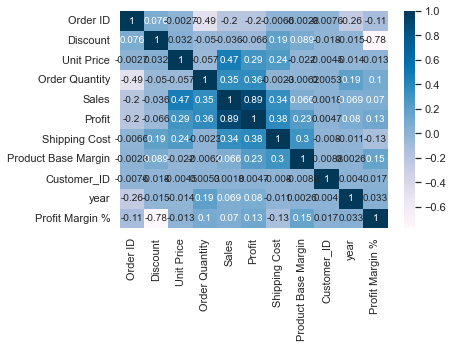

In [ ]:
# compare linear relationships between attributes using correlation coefficient generated using
    # correlation matrix
sns.heatmap(df.corr(), cmap = 'PuBu', annot = True)
plt.show()

# Observation-
In this situation, the only predictors considered to be eliminated are those with intercorrelations greater than 0.95, implying that they are almost perfect descriptions of each other. It would be pointless to include them both. As a result, no attributes were eliminated in order to avoid losing important data and degrading the entire EDA process. In this situation, the only predictors considered to be eliminated are those with intercorrelations greater than 0.95, implying that they are almost perfect descriptions of each other. It would be pointless to include them both. As a result, no attributes were eliminated in order to avoid losing important data and degrading the entire EDA process.

# Descriptive Statistics

Here, we will do a descriptive statistical analysis. 
We use df.describe() and assign ‘include = ‘all’ to ensure that categorical features are also included in the output.

In [ ]:
# Get descriptive statistics summary
df.describe(include = "all")

,Order ID,Order Priority,Order Date,Discount,Unit Price,Order Quantity,Sales,Profit,Shipping Cost,Product Base Margin,...,Customer_ID,Customer Name,Region,State,Country,City,Ship Date,Ship Mode,year,Profit Margin %
count,13442.000000,13442,13442,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000,...,13442.000000,13442,13442,13442,13442,13442,13442,13442,13442.000000,13442.000000
unique,NaN,5,1422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2989,4,149,50,1440,1456,3,NaN,NaN
top,NaN,High,2012-09-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Rosemary Hedrick,North America,California,United States of America,Guangzhou,2012-05-21 00:00:00,Regular Air,NaN,NaN
freq,NaN,2849,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,40,6288,685,6232,351,36,9967,NaN,NaN
first,NaN,NaN,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-02 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2013-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-13 00:00:00,NaN,NaN,NaN
mean,54167.230546,NaN,NaN,0.056111,88.733150,28.891088,1956.722483,961.519600,12.966820,0.499305,...,1759.850617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.399940,35.475894
std,31811.102195,NaN,NaN,0.081781,299.273966,28.424996,5030.425928,2544.461944,17.354609,0.154470,...,977.410612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.048199,76.317500
min,3.000000,NaN,NaN,0.000000,1.000000,1.000000,0.940000,-3892.600000,0.000000,0.036000,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,-2483.661972
25%,25356.500000,NaN,NaN,0.020000,6.000000,8.000000,99.750000,32.325000,3.000000,0.380000,...,916.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,31.060606


In [ ]:
# total Sales
round(sum(df['Sales']), 2)

26302263.62

In [ ]:
# total Quantity sold
sum(df['Order Quantity'])

388354

In [ ]:
# total Profit
round(sum(df['Profit']), 2)

12924746.46

# Observations
Total sales value was USD$26302263.62, and USD$1956.7224 on average for each transaction. 
This can range from USD$0.940000   to a highest sales value of USD$99130.120000 for an individual transaction. 
Total quantity sold was 388354, and 29 on average for each transaction. 
This can range from 1 to a highest quantity of 288 products for an individual transaction. 
Average discount was 56% for each transaction. 
This can range from no discount to a notable highest discount of 95% for an individual transaction. 
Overall, the Superstore made a considerably good profit of USD$12924746.46, and USD$961.5196 on average for each transaction.
However, this can range from a loss of USD$3892.600 to a profit of USD$60250.6400 for an individual transaction. 
Higher discounts likely played a major role in the more significant losses.


# Exploratory Analysis and Visualization
Before formal modelling, graphical representations, and visualisations, EDA seeks to do preliminary studies on data in order to uncover patterns, check assumptions, and test hypotheses. The summarised statistics on primary characteristics and hidden trends in data can assist the Superstore in identifying issue areas and resolving them, which can enhance profitability.



# Here showing segment wise  Sales data with %

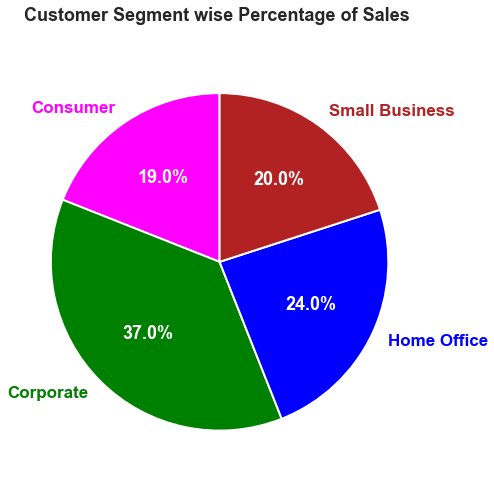

In [ ]:
pie_data = (df.groupby('Customer Segment')['Sales'].sum()).to_frame()
fig, ax = plt.subplots(figsize=(7, 7))
pie_data['Percent_Sale'] = round((pie_data.Sales/sum(pie_data.Sales))*100)
patches, texts, pcts =ax.pie(pie_data.Percent_Sale, labels=pie_data.index,  startangle=90, autopct='%.1f%%',
                             colors=['fuchsia','green','blue','firebrick'],
                             wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
                             textprops={'size': 'x-large'})

ax.set_title('Customer Segment wise Percentage of Sales ', fontsize=18,pad=30,fontweight='bold')
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(texts, fontsize=17,fontweight='bold')
# Style just the percent values.
plt.setp(pcts, color='white', fontweight='bold',fontsize=18)
plt.tight_layout()

# Observation-
Corporate segment is contributing more sales, followed by Home Office Segment.Small Business and Consumer are almost perfoming same. Hence, marketing strategy has to target or place more focus on retaining Consumer and Corporate Segment customers.

# Showing Department and Region wise Sales using stack bar 

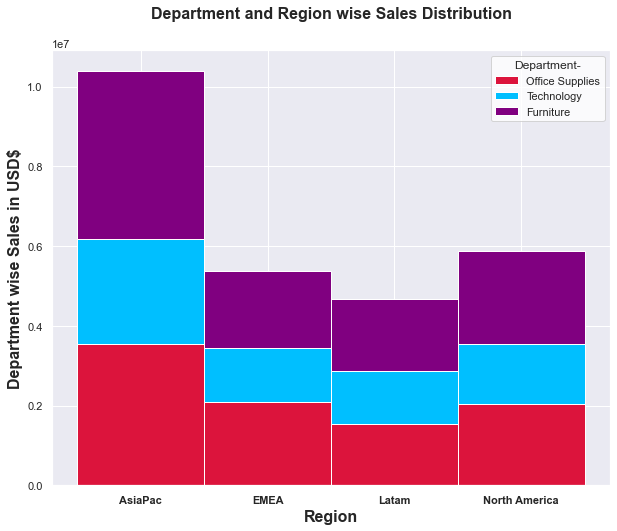

In [ ]:
Dept_reg =  pd.pivot_table(df,index=['Region'], columns=['Department'], values=['Sales'], aggfunc='sum')

Dept_reg.columns = Dept_reg.columns.droplevel(0)
Dept_reg = Dept_reg.reset_index().rename_axis(None, axis=1)

fig, ax = plt.subplots(figsize=(10, 8))
bars1 = Dept_reg['Furniture']
bars2 = Dept_reg['Office Supplies']
bars3 = Dept_reg['Technology']
 
sns.set_theme(style="whitegrid")
bars = np.add(bars1, bars2).tolist()
 

r = Dept_reg['Region']


plt.bar(r, bars1, color='crimson', edgecolor='white', width=1)

plt.bar(r, bars2, bottom=bars1, color='deepskyblue', edgecolor='white', width=1)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='purple', edgecolor='white', width=1) 
plt.xticks(r, r, fontweight='bold')
plt.xlabel("Region", fontsize=16, fontweight='bold')
plt.ylabel("Department wise Sales in USD$",fontsize=16, fontweight='bold')
plt.title("Department and Region wise Sales Distribution",fontsize=16, fontweight='bold',pad=32)
plt.legend(df.Department.unique(),loc='upper right',title = "Department-")
plt.show()

# Observation-
From all the three departments i.e, Technology, Furniture and Office supplies, the most sales are contributed from AsiaPac region followed by North America.
The least amount of Sales are from Latam and EMEA Region. Thus, the marketing team has to focus on increasing the Sales from all the departments in Latam and EMEA region.


# Profit/Loss & Sales in USD

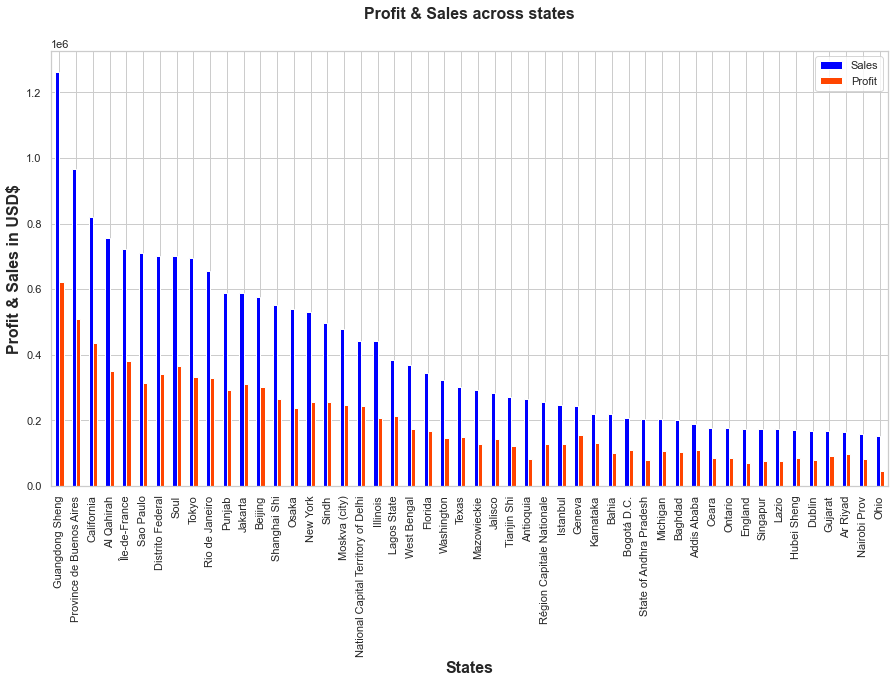

In [ ]:

ps = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False).head(50)
ps[:].plot.bar(color=['blue','orangered'],figsize=(15,8))
plt.title('Profit & Sales across states',fontsize=16, fontweight='bold',pad=32)
plt.xlabel('States',fontsize=16, fontweight='bold')
plt.ylabel('Profit & Sales in USD$',fontsize=16, fontweight='bold')
plt.show()

# Observation 
High profit is for Guangdong Sheng, Province De Buenos Aires.
Lowest Profit is for State of Andra Pradesh, Antioquia, Ohio, England.

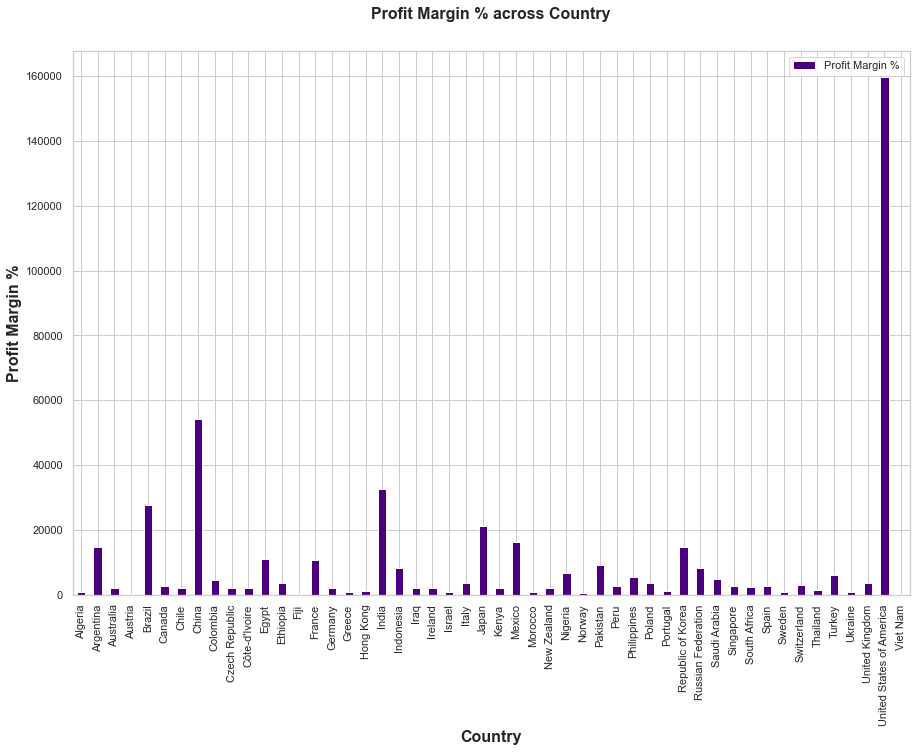

In [ ]:
ps = df.groupby('Country')[['Profit Margin %']].sum().sort_values(by='Country',ascending=True)
ps[:].plot.bar(color=['indigo'],figsize=(15,10))
plt.title('Profit Margin % across Country',fontsize=16, fontweight='bold',pad=32)
plt.xlabel('Country',fontsize=16, fontweight='bold')
plt.ylabel('Profit Margin %',fontsize=16, fontweight='bold')
plt.show()

# Observation 
Highest profit Margin % on Items Sold is in United States of America, followed by China and India
Lowest Profit is for Algeria, Morocco, Greece, Norway. For Austria, Fiji, Viet Nam there is no profit margin % earned by Superstore.

# Showing Department wise Sales data 

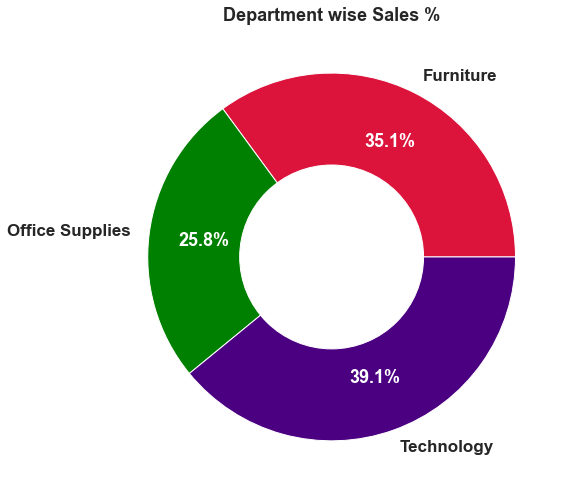

In [ ]:
donut_data = (df.groupby('Department')['Sales'].sum()).to_frame()
donut_data['Percent_Sale'] = (donut_data.Sales/sum(donut_data.Sales))*100
fig, ax = plt.subplots(figsize=(8, 8))
my_circle=plt.Circle( (0,0), 0.5, color='white')
patches, texts, pcts= ax.pie(donut_data.Percent_Sale, labels=donut_data.index, autopct='%1.1f%%',colors=['crimson','green','indigo'],
                            pctdistance=0.7)
p=plt.gcf();p.gca().add_artist(my_circle);
ax.set_title('Department wise Sales %', fontsize=18,fontweight='bold')

plt.setp(texts, fontsize=17,fontweight='bold')
# Style just the percent values.
plt.setp(pcts, color='white', fontweight='bold',fontsize=18)
plt.tight_layout()
plt.show()

# Observation-
There are 3 categories in 'Department', where “Technology” has the highest sales contribution of 39.1%, 
“Furniture” has the sales of about 35.1% ,and “Office Supplies” is notably with around 25.8%. 


# Which Department is Best Selling and Most Profitable?

In [ ]:
# Group sales, profit and quantity by category
category_analysis = pd.DataFrame(df.groupby(['Department'])[['Sales', 'Profit', 'Order Quantity']].sum())
category_analysis

,Sales,Profit,Order Quantity
Department,,,
Furniture,9227171.64,5420649.97,82878
Office Supplies,6796815.25,2916722.92,218640
Technology,10278276.73,4587373.57,86836


In [ ]:
category_analysis.rename(columns = {'Order Quantity':'Order_Quantity'}, inplace = True)

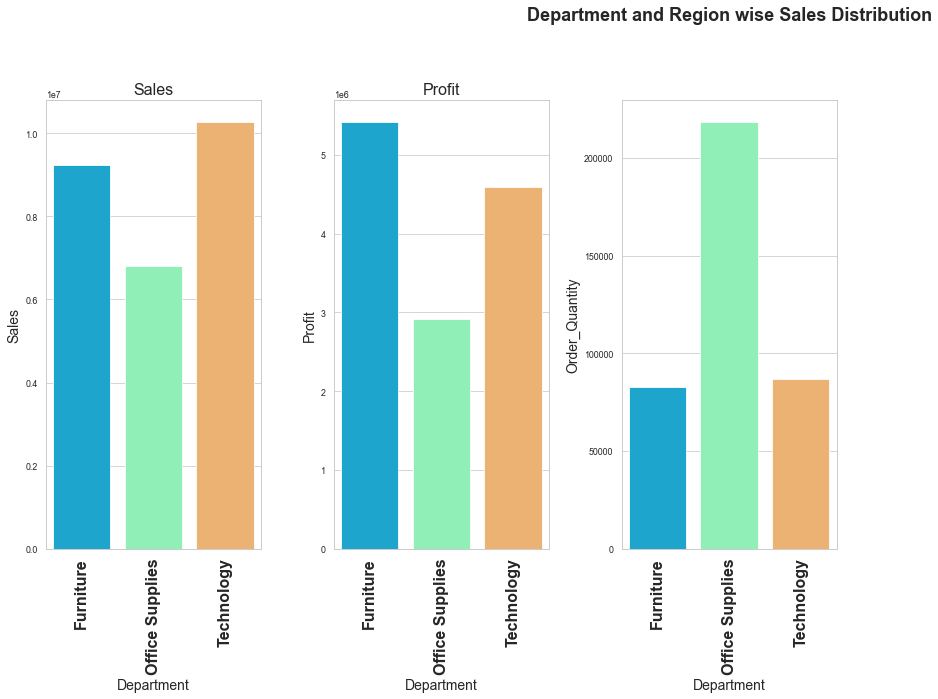

In [ ]:
# Set for grouped plots - figure with a 2x2 grid of Axes
sns.set_theme(style="whitegrid")
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":14,"font.weight":"bold"})   
figure, axis = plt.subplots(1, 3, figsize=(12, 10))
# Plot barplots
cat1 = sns.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[0],palette = 'rainbow')
cat2 = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1],palette='rainbow')
cat3 = sns.barplot(x = category_analysis.index, y = category_analysis.Order_Quantity, ax=axis[2],palette='rainbow')
# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 16, weight='bold')
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 16, weight='bold')
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 16, weight='bold')

# Set spacing between subplots
plt.title("Department and Region wise Sales Distribution",fontsize=18, fontweight='bold',pad=80)
figure.tight_layout()

# Our observations are:
All 3 Departments — Furniture, Office Supplies and Technology make different amount of sales.
Technology is Best Selling and it’s good to know that this Department is the also making good Profit.This products are like One-Time buy products as these can usually last at least 4–5 years.
Although Furniture makes similar sales as Technology, it is the most profitable and quantity sold are at a minimum too.
Office Supplies sells the most in terms of quantity as it is relatively cheap product but it makes less profit too.

# 2. What are the Best Selling and Most Profitable Category in 2012?

In [ ]:
# Group by category
cat_analysis = pd.DataFrame(df.groupby(['Category',])[['Sales', 'Profit']].sum())
# Sort by descending order according to sales
cat_sales = pd.DataFrame(cat_analysis.sort_values('Sales', ascending = False))
cat_sales

,Sales,Profit
Category,,
Office Machines,3888638.22,1404881.02
Tables,3466941.49,2082670.57
Chairs & Chairmats,3005695.30,1762860.32
Telephones and Communication,2904764.59,1613672.26
Copiers and Fax,2076959.50,788203.50
Storage & Organization,2047286.45,1107126.98
Binders and Binder Accessories,1798771.04,484376.53
Bookcases,1510083.02,945454.71
Computer Peripherals,1407914.42,780616.79


In [ ]:
# Sort by descending order according to profit
cat_profit = pd.DataFrame(cat_analysis.sort_values('Profit', ascending = False))
cat_profit

,Sales,Profit
Category,,
Tables,3466941.49,2082670.57
Chairs & Chairmats,3005695.30,1762860.32
Telephones and Communication,2904764.59,1613672.26
Office Machines,3888638.22,1404881.02
Storage & Organization,2047286.45,1107126.98
Bookcases,1510083.02,945454.71
Copiers and Fax,2076959.50,788203.50
Computer Peripherals,1407914.42,780616.79
Appliances,1332145.76,677924.33


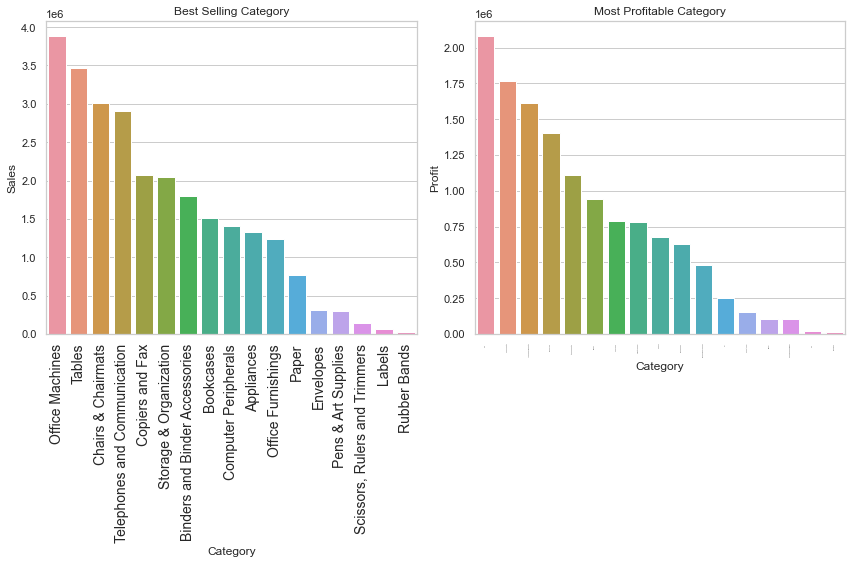

In [ ]:
# Plot Bar Plots
sns.set_theme(style="whitegrid")
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 8))
# Plot Bar Plot for Best Selling Category
subcat1 = sns.barplot(data = cat_sales, x = cat_sales.index, y = cat_sales.Sales, ax=axis[0])
subcat1.set(title="Best Selling Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 14)
# Plot Bar Plot for Most Profitable Category
subcat2 = sns.barplot(data = cat_profit, x = cat_profit.index, y = cat_profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 1)
# Set spacing between subplots
figure.tight_layout()
plt.show()

# Let’s analyse the bar plots:-
Office Machines and Tables are Top 2 best selling sub-category.
Tables produces most profit, followed by Chairs & Chairmats, Telephones and Communication,Office Machines. 
The marketing strategy has to focus more on marketing these products.
On the other end of the spectrum, Envelopes, Scissors, Rulers and Trimmers, Labels and Rubber Bands make 
close to zero margin to losses. 
These are products that SuperStore can consider dropping from the product catagory or increase the sale price
and profit margin or bargain for a lower price from the supplier.

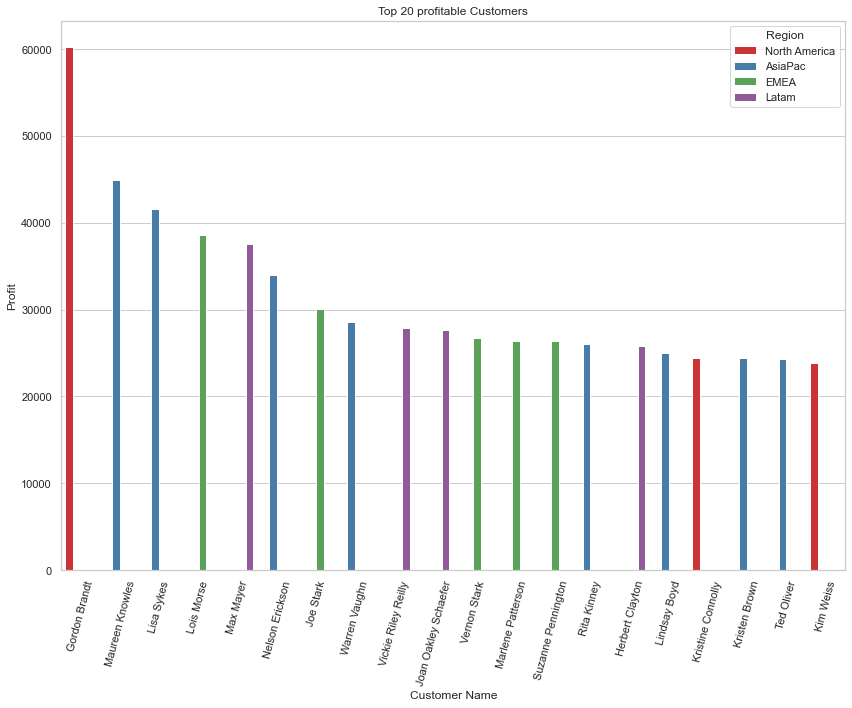

In [ ]:
#Top 10 Customers who benefitted the store
sortedTop10 = df.sort_values(['Profit'], ascending=False).head(20)
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
p = sns.barplot(x='Customer Name', y='Profit',hue='Region',palette='Set1', data=sortedTop10, ax=ax)
ax.set_title("Top 20 profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

# Observation
We see that majority of the Profitable Customers are from Asia Pacific Region

In [ ]:
#Calculating the time taken for an order to ship and converting the no. of days in int format
df['Shipment Duration']=(pd.to_datetime(df['Ship Date'])-pd.to_datetime(df['Order Date'])).dt.days
df['Shipment Duration']

0        2
1        1
2        0
3        1
4        1
        ..
13437    2
13438    2
13439    3
13440    0
13441    3
Name: Shipment Duration, Length: 13442, dtype: int64

In [ ]:
df.iloc[:,[0,22,25]]

,Order ID,Ship Mode,Shipment Duration
0,4132,Regular Air,2
1,20513,Express Air,1
2,36262,Express Air,0
3,36262,Express Air,1
4,36262,Regular Air,1
...,...,...,...
13437,46212,Delivery Truck,2
13438,46212,Express Air,2
13439,56581,Express Air,3
13440,87531,Delivery Truck,0


# 1. What is the region wise sales value?

In [ ]:
df.groupby("Region").Sales.sum()

Region
AsiaPac          10386542.86
EMEA              5381237.63
Latam             4670043.63
North America     5864439.50
Name: Sales, dtype: float64

# 2.What is the top 10 selling products?

In [ ]:
df.groupby("Item").Sales.sum().sort_values(ascending=False).head(10)

Item
Polycom ViewStation™ ISDN Videoconferencing Unit                                    442862.07
Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish                       421831.61
Global Troy™ Executive Leather Low-Back Tilter                                      421686.69
Hewlett Packard LaserJet 3310 Copier                                                350460.00
Canon PC940 Copier                                                                  348889.50
Smead Adjustable Mobile File Trolley with Lockable Top                              344485.04
Bretford CR8500 Series Meeting Room Furniture                                       264625.24
Hewlett-Packard cp1700 [D, PS] Series Color Inkjet Printers                         259608.18
Canon PC1080F Personal Copier                                                       241890.00
SAFCO PlanMaster Heigh-Adjustable Drafting Table Base, 43w x 30d x 30-37h, Black    239811.86
Name: Sales, dtype: float64

# 3.What are the top 5 profitable products

In [ ]:
df.groupby("Item").Profit.sum().sort_values(ascending=False).head(5)

Item
Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish        254500.95
Global Troy™ Executive Leather Low-Back Tilter                       244172.29
Bretford CR8500 Series Meeting Room Furniture                        165214.62
Chromcraft Bull-Nose Wood 48" x 96" Rectangular Conference Tables    153234.58
Canon PC940 Copier                                                   136459.50
Name: Profit, dtype: float64

#  4.What are the different ship mode?

In [ ]:
diff_ship_mode=df['Ship Mode'].unique()
for x in diff_ship_mode:
    print(x)

Regular Air
Express Air
Delivery Truck


# 5.What are the category wise profit?

In [ ]:
df.groupby("Category").Profit.sum()

Category
Appliances                         677924.33
Binders and Binder Accessories     484376.53
Bookcases                          945454.71
Chairs & Chairmats                1762860.32
Computer Peripherals               780616.79
Copiers and Fax                    788203.50
Envelopes                          107637.94
Labels                              20996.17
Office Furnishings                 629664.37
Office Machines                   1404881.02
Paper                              249736.70
Pens & Art Supplies                150396.30
Rubber Bands                        13056.36
Scissors, Rulers and Trimmers      105471.61
Storage & Organization            1107126.98
Tables                            2082670.57
Telephones and Communication      1613672.26
Name: Profit, dtype: float64

In [ ]:
df["Sales"].mean()

1956.7224832614208

In [ ]:
df['Ship Mode'] = df['Ship Mode'].astype('str')

In [ ]:
Year= df['year']
# Get the unique values of 'B' column
years=df.year.unique()
years

array([2012, 2013, 2011, 2010], dtype=int64)

In [ ]:

# Groupby multiple columns & multiple aggregations
result_1 = df.groupby('year').aggregate({'Sales':'sum','Profit':'sum'})
print(result_1)

           Sales      Profit
year                        
2010  5945250.90  2797731.55
2011  6083426.13  2911980.75
2012  7180271.44  3588900.40
2013  7093315.15  3626133.76


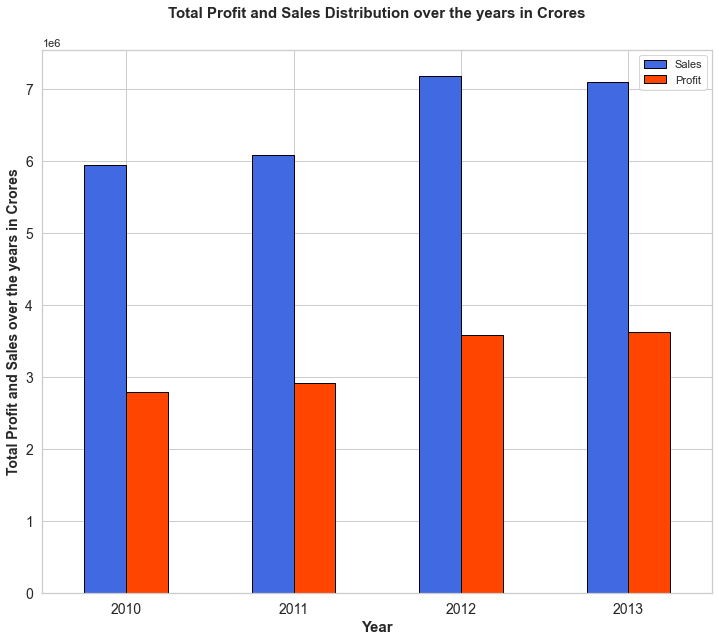

In [ ]:

dfs = pd.DataFrame(result_1, columns=["year", "Sales", "Profit"])

# plot the dataframe
dfs.plot(y=["Sales", "Profit"], kind="bar", figsize=(12, 10),rot=0,edgecolor = "black",color=['royalblue','orangered'])
plt.xlabel("Year",fontweight ='bold', fontsize = 15)
plt.ylabel("Total Profit and Sales over the years in Crores",fontweight ='bold', fontsize = 14)
plt.title("Total Profit and Sales Distribution over the years in Crores",fontweight ='bold', fontsize = 15,pad=32)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# print bar graph
plt.show()


# Distribution of Top 10 Products

In [ ]:
#number of products available in store
df['Item'].nunique()

1233

In [ ]:
df['Item'].value_counts()

Global High-Back Leather Tilter, Burgundy                            40
Bevis 36 x 72 Conference Tables                                      36
80 Minute CD-R Spindle, 100/Pack - Staples                           36
Wilson Jones Hanging View Binder, White, 1"                          35
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables    35
                                                                     ..
Fellowes Mobile File Cart, Black                                      1
Xerox 223                                                             1
V66                                                                   1
Eureka The Boss® Plus 12-Amp Hard Box Upright Vacuum, Red             1
Accessory1                                                            1
Name: Item, Length: 1233, dtype: int64

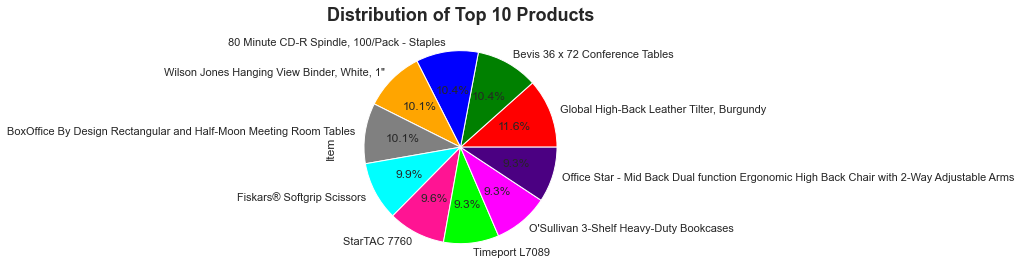

In [ ]:
#Distribution of Top 10 Products
plt.figure(figsize=(12,10))
df['Item'].value_counts().head(10).plot.pie(autopct="%1.1f%%", colors=["red","green","blue","orange","grey","cyan","deeppink","lime","magenta","indigo"])
plt.setp(texts, fontsize=18,fontweight='bold')
# Style just the percent values.
plt.title('Distribution of Top 10 Products', fontsize=18,fontweight='bold')
plt.setp(pcts, color='white', fontweight='bold',fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:
pd.options.display.float_format = '{:,}'.format

# Total Orders delivered by different Types of Ship Mode

In [ ]:
#df[~(df['Country'] == "United States of America")] 
df1=df.loc[df['Country'] == "United States of America"]

In [ ]:
Ship_Mode = df1['Ship Mode'].value_counts()
Ship_Mode

Regular Air       4601
Delivery Truck     858
Express Air        773
Name: Ship Mode, dtype: int64

In [ ]:
Ship_Mode = df1['Ship Mode'].value_counts(normalize=True)
O_ID = df1['Order ID'].value_counts()

In [ ]:
Ship_Mode

Regular Air      0.7382862644415917
Delivery Truck   0.1376765083440308
Express Air      0.1240372272143774
Name: Ship Mode, dtype: float64

In [ ]:
# counting unique values
n = len(pd.unique(df1['Order ID']))
  
print("No.of.unique values :", 
      n)

No.of.unique values : 4242


In [ ]:
O_ID

90571    6
86510    5
88060    5
42528    5
86983    5
        ..
90538    1
90541    1
90547    1
90539    1
87530    1
Name: Order ID, Length: 4242, dtype: int64

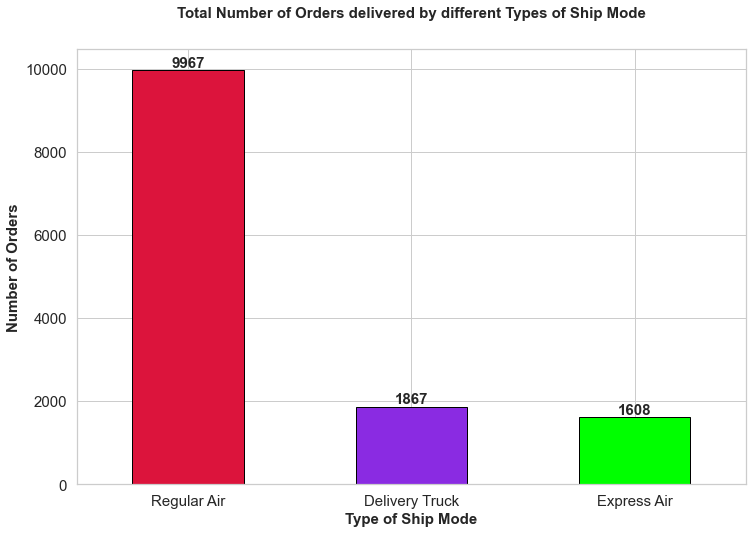

In [ ]:
ax = df['Ship Mode'].value_counts().plot(kind='bar',rot=360,
                                    figsize=(12,8),color=['crimson', 'blueviolet', 'lime'],edgecolor = "black")
ax.bar_label(ax.containers[0],fontweight ='bold', fontsize = 15)
ax.set_title("Total Number of Orders delivered by different Types of Ship Mode",fontweight ='bold', fontsize = 15,pad=32)
ax.set_xlabel("Type of Ship Mode",fontweight ='bold', fontsize = 15)
ax.set_ylabel("Number of Orders",fontweight ='bold', fontsize = 15)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)

# Observation-
As seen in the above bar graph, about 9967 orders have been shipped by Regular Ship Mode.
Followed by Delivery Truck and Express Air delivery lowest no. of Orders, since the cost of shipping is high.

# Orders % delivered by different Types of Ship Mode in USA

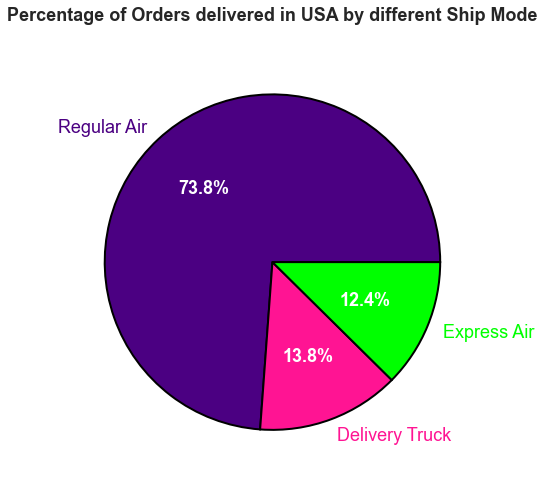

In [ ]:
labels = ['Regular Air', 'Delivery Truck', 'Express Air']
fig, ax = plt.subplots(figsize=(7, 7))
#colors
colors = ['indigo','deeppink','lime']
patches, texts, pcts = ax.pie(Ship_Mode, labels=labels, autopct='%.1f%%',colors=colors,
       wedgeprops={'linewidth': 2.0, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
ax.set_title('Percentage of Orders delivered in USA by different Ship Mode', fontsize=18,pad=32,fontweight='bold' )
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(texts, fontsize=18)
# Style just the percent values.
plt.setp(pcts, color='white', fontweight='bold',fontsize=18)
plt.tight_layout()


# Observation-
From the above pie chart, It is seen that customers have highly selected Regular Air shipping mode. Since it is customer and cost friendly , about 73.8% of total Orders have been delivered by Regular Air mode and least followed by Delivery Truck and Express air.

#  What is the total profit earned ratio by selling items from Furniture department between the year  2011-12 in New-York City and Los Angeles?

In [ ]:
Year= df['year']

In [ ]:
#Filtering Cities
df2=df[df['City'].isin(['New York City', 'Los Angeles'])]
df2

,Order ID,Order Priority,Order Date,Discount,Unit Price,Order Quantity,Sales,Profit,Shipping Cost,Product Base Margin,...,Customer Name,Region,State,Country,City,Ship Date,Ship Mode,year,Profit Margin %,Shipment Duration
69,9895,Low,2011-04-20,0.05,6,9,51.3,25.54,2,0.56,...,Tony Wilkins Winters,North America,New York,United States of America,New York City,2011-04-24,Regular Air,2011,49.785575048732944,4
70,17860,Critical,2012-04-06,0.05,8,18,136.8,67.32,9,0.58,...,Tony Wilkins Winters,North America,New York,United States of America,New York City,2012-04-08,Express Air,2012,49.210526315789465,2
71,26887,Critical,2012-05-15,0.08,43,60,"2,373.6","1,233.4",5,0.56,...,Tony Wilkins Winters,North America,New York,United States of America,New York City,2012-05-16,Express Air,2012,51.96326255476913,1
72,26887,Critical,2012-05-15,0.07,8,36,267.84,86.04,9,0.4,...,Tony Wilkins Winters,North America,New York,United States of America,New York City,2012-05-15,Express Air,2012,32.123655913978496,0
73,41793,High,2010-05-15,0.05,26,70,"1,729.0",793.8,7,0.49,...,Tony Wilkins Winters,North America,New York,United States of America,New York City,2010-05-16,Regular Air,2010,45.910931174089065,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12929,18534,Low,2012-12-30,0.1,8,72,518.4,239.92,2,0.52,...,Emily Britt,North America,California,United States of America,Los Angeles,2012-12-30,Express Air,2012,46.28086419753086,0
12930,23968,Critical,2012-03-04,0.05,6,21,119.7,34.32,6,0.37,...,Emily Britt,North America,California,United States of America,Los Angeles,2012-03-07,Regular Air,2012,28.671679197994987,3
12931,38337,Medium,2011-10-31,0.09,3,83,226.59,116.03,1,0.56,...,Emily Britt,North America,California,United States of America,Los Angeles,2011-11-02,Regular Air,2011,51.20702590582109,2
12932,39238,Critical,2011-09-26,0.1,41,16,590.4,167.56,3,0.36,...,Emily Britt,North America,California,United States of America,Los Angeles,2011-09-27,Express Air,2011,28.38075880758808,1


In [ ]:
#Filtering Department
df3=df2.loc[df['Department'] == "Furniture"]
df3

,Order ID,Order Priority,Order Date,Discount,Unit Price,Order Quantity,Sales,Profit,Shipping Cost,Product Base Margin,...,Customer Name,Region,State,Country,City,Ship Date,Ship Mode,year,Profit Margin %,Shipment Duration
73,41793,High,2010-05-15,0.05,26,70,"1,729.0",793.8,7,0.49,...,Tony Wilkins Winters,North America,New York,United States of America,New York City,2010-05-16,Regular Air,2010,45.910931174089065,1
77,50533,Not Specified,2012-05-31,0.95,15,5,3.75,-42.25,28,0.76,...,Tony Wilkins Winters,North America,New York,United States of America,New York City,2012-06-01,Delivery Truck,2012,"-1,126.6666666666667",1
261,37537,Low,2010-01-02,0.07,101,43,"4,038.99","2,647.66",45,0.69,...,Scott Bunn,North America,New York,United States of America,New York City,2010-01-04,Delivery Truck,2010,65.55252674554777,2
262,37537,Low,2010-01-02,0.0,292,4,"1,168.0",605.08,49,0.56,...,Scott Bunn,North America,New York,United States of America,New York City,2010-01-02,Delivery Truck,2010,51.80479452054795,0
263,55713,High,2010-02-02,0.09,123,49,"5,484.57","3,847.55",70,0.74,...,Scott Bunn,North America,New York,United States of America,New York City,2010-02-04,Delivery Truck,2010,70.15226353205448,2
1693,7079,Medium,2011-02-08,0.01,281,44,"12,240.36","9,463.28",57,0.78,...,Michael Wiggins,North America,New York,United States of America,New York City,2011-02-09,Delivery Truck,2011,77.31210519952027,1
1697,53248,Critical,2011-10-29,0.95,348,13,226.2,"-1,532.92",40,0.62,...,Michael Wiggins,North America,New York,United States of America,New York City,2011-10-30,Delivery Truck,2011,-677.6834659593281,1
1978,359,Medium,2010-12-18,0.08,124,56,"6,388.48","3,767.2",52,0.63,...,Kristine Connolly,North America,California,United States of America,Los Angeles,2010-12-19,Delivery Truck,2010,58.968643558405134,1
1984,35046,Medium,2011-07-24,0.03,108,54,"5,657.04","3,609.84",6,0.65,...,Kristine Connolly,North America,California,United States of America,Los Angeles,2011-07-25,Express Air,2011,63.81146323872555,1
1985,35046,Medium,2011-07-24,0.07,285,16,"4,240.8","2,346.8",70,0.6,...,Kristine Connolly,North America,California,United States of America,Los Angeles,2011-07-25,Delivery Truck,2011,55.33861535559329,1


In [ ]:
#Filtering Cities
df_year=df3[df['year'].isin([2011, 2012])]
df_year

,Order ID,Order Priority,Order Date,Discount,Unit Price,Order Quantity,Sales,Profit,Shipping Cost,Product Base Margin,...,Customer Name,Region,State,Country,City,Ship Date,Ship Mode,year,Profit Margin %,Shipment Duration
77,50533,Not Specified,2012-05-31,0.95,15,5,3.75,-42.25,28,0.76,...,Tony Wilkins Winters,North America,New York,United States of America,New York City,2012-06-01,Delivery Truck,2012,"-1,126.6666666666667",1
1693,7079,Medium,2011-02-08,0.01,281,44,"12,240.36","9,463.28",57,0.78,...,Michael Wiggins,North America,New York,United States of America,New York City,2011-02-09,Delivery Truck,2011,77.31210519952027,1
1697,53248,Critical,2011-10-29,0.95,348,13,226.2,"-1,532.92",40,0.62,...,Michael Wiggins,North America,New York,United States of America,New York City,2011-10-30,Delivery Truck,2011,-677.6834659593281,1
1984,35046,Medium,2011-07-24,0.03,108,54,"5,657.04","3,609.84",6,0.65,...,Kristine Connolly,North America,California,United States of America,Los Angeles,2011-07-25,Express Air,2011,63.81146323872555,1
1985,35046,Medium,2011-07-24,0.07,285,16,"4,240.8","2,346.8",70,0.6,...,Kristine Connolly,North America,California,United States of America,Los Angeles,2011-07-25,Delivery Truck,2011,55.33861535559329,1
1988,53314,High,2011-09-19,0.01,79,60,"4,692.6","1,970.8",20,0.43,...,Kristine Connolly,North America,California,United States of America,Los Angeles,2011-09-19,Regular Air,2011,41.99803946639389,0
1989,53314,High,2011-09-19,0.05,146,27,"3,744.9","2,470.88",52,0.69,...,Kristine Connolly,North America,California,United States of America,Los Angeles,2011-09-21,Delivery Truck,2011,65.97986595102672,2
2596,21539,Medium,2011-07-09,0.05,71,47,"3,170.15","2,033.31",69,0.68,...,Jenny Gold,North America,California,United States of America,Los Angeles,2011-07-09,Regular Air,2011,64.13923631373909,0
2598,26784,Critical,2011-07-23,0.02,121,14,"1,660.12","1,020.28",30,0.64,...,Jenny Gold,North America,California,United States of America,Los Angeles,2011-07-24,Delivery Truck,2011,61.45820784039708,1
2601,36196,Not Specified,2012-08-06,0.09,10,12,109.2,40.8,6,0.48,...,Jenny Gold,North America,California,United States of America,Los Angeles,2012-08-07,Regular Air,2012,37.36263736263736,1


In [ ]:
df_year_profit=df_year.groupby(['City','year']).aggregate({'Profit':'sum'})
df_year_profit.round(2)
#df_year.groupby(['year']).size().reset_index(name='counts')

Profit
City          year          
Los Angeles   2011 21,155.11
              2012 92,782.35
New York City 2011 11,664.03
              2012 12,642.03

In [ ]:
A=df_year_profit[:2]

In [ ]:
# Understanding the Pandas diff method
A1=A.diff(
    periods=1,          # Periods to shift for calculating difference
    axis=0              # The axis to caclulate the different on
)
LA_Profit=A1[1:]
LA_Profit

,,Profit
City,year,
Los Angeles,2012,"71,627.24"


In [ ]:
B=df_year_profit[2:]

In [ ]:
# Understanding the Pandas diff method
B1=B.diff(
    periods=1,          # Periods to shift for calculating difference
    axis=0              # The axis to caclulate the different on
)
NWC_Profit=B1[1:]
NWC_Profit

,,Profit
City,year,
New York City,2012,977.9999999999982


In [ ]:
df_year_profit =[LA_Profit, NWC_Profit]

df_year_profit = pd.concat(df_year_profit)
df_year_profit

,,Profit
City,year,
Los Angeles,2012,"71,627.24"
New York City,2012,977.9999999999982


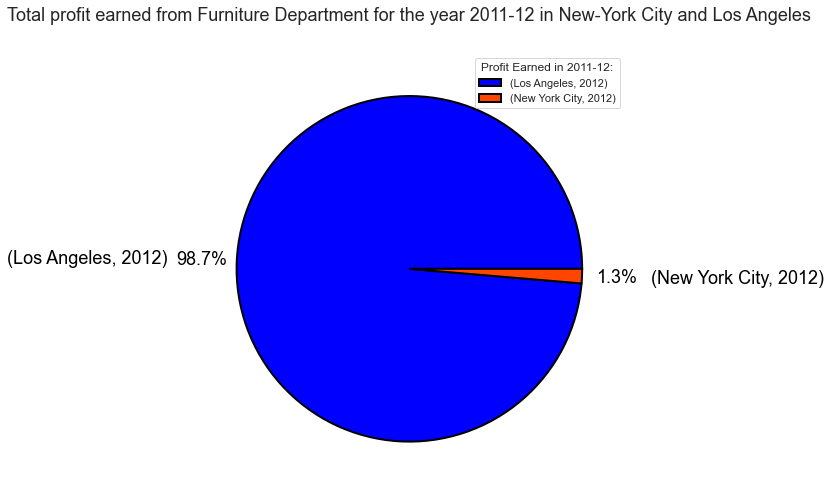

In [ ]:
import pylab

colors = ['blue','orangered']
df_year_profit.plot(kind="pie",figsize=(10, 8),rot=0,subplots=True,autopct='%.1f%%',colors=colors,
                    pctdistance=1.2, ylabel='',labeldistance=1.4, 
                    wedgeprops={'linewidth': 2.0, 'edgecolor': 'black'},
                    textprops={'size': '18','color':'black'})

     
plt.title('Total profit earned from Furniture Department for the year 2011-12 in New-York City and Los Angeles', fontsize=18,pad=32)

plt.legend(title = "Profit Earned in 2011-12:")
# Style just the percent values.
plt.tight_layout()


# Observation-
About 98.7% profit is earned from Furniture Department from the year 2011-12 in New-York City.
And only 1.3% of Profit from item sold from Furniture Department in Los Angeles.
Thus the marketing team must focus on marketing more Furniture products in Los Angeles, since there is high profit margin on these items.

# Which City has the Highest Number of Sales?

In [ ]:
city_sales = pd.DataFrame(df.groupby(['City'])['Sales', 'Order Quantity'].sum().sort_values('Sales',ascending = False))
top10 = city_sales[:10]
top10

,Sales,Order Quantity
City,,
Guangzhou,"1,086,667.59",14740
Buenos Aires,"965,268.04",14224
Cairo,"755,908.34",9355
Paris,"726,752.3",9823
Sao Paulo,"708,849.99",8751
Seoul,"699,861.12",12061
Tokyo,"696,361.79",10680
Mexico City,"658,472.62",10049
Rio de Janeiro,"655,421.83",10355


In [ ]:
bottom10 = city_sales[-10:]
bottom10

,Sales,Order Quantity
City,,
Owasso,11.4,2
Rockville,11.28,6
Milton,7.28,4
Waltham,5.94,1
Cheshire,5.88,1
Springdale,5.88,1
Linden,5.46,1
Altus,4.75,1
Palmer,4.4,2


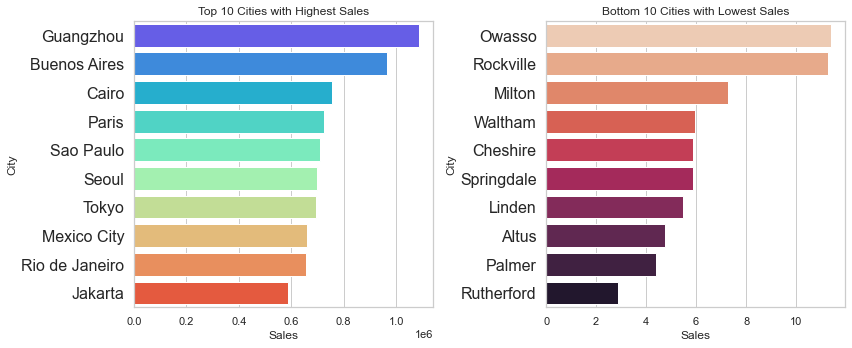

In [ ]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme(style="whitegrid")
top10c = sns.barplot(data = top10, y = top10.index, x = top10.Sales, palette = "rainbow", ax = axis[0])
top10c.set(Title = "Top 10 Cities with Highest Sales")
top10c.set_yticklabels(top10c.get_yticklabels(),size = 16)
# Plot Bar Plot for Best Selling Sub-Category
bottom10c = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.Sales, palette = "rocket_r", ax=axis[1])
bottom10c.set(Title = "Bottom 10 Cities with Lowest Sales")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 16)
# Set spacing between subplots
figure.tight_layout()
plt.show()

# Observation-
There is a huge disparity between the cities with highest sales and lowest sales. Marketing strategy has to target the top 10 cities.


In [ ]:
# transactions with Discount
df_discounted = df[df['Discount'] > 0]

# transactions without Discount
df_no_discount = df[df['Discount'] == 0]

print ("On Average :")

print("Discounted Sales per transaction is USD$", round(df_discounted['Sales'].mean(), 2), 
      ", without is USD$", round(df_no_discount['Sales'].mean(), 2))

print("Discounted Unit Price is USD$", round(df_discounted['Unit Price'].mean(), 2), 
      ", without is USD$", round(df_no_discount['Unit Price'].mean(), 2))

print("Discounted Quantity purchased per transaction is ", round(df_discounted['Order Quantity'].mean(), 2), 
      ", without is ", round(df_no_discount['Order Quantity'].mean(), 2))

print("Discounted Profit per transaction is USD$", round(df_discounted['Profit'].mean(), 2), 
      ", without is USD$", round(df_no_discount['Profit'].mean(), 2))


print(" ")

print ("In Total :")

print("Discounted Total Sales is USD$", round(df_discounted['Sales'].sum(), 2), 
      ", without is USD$", round(df_no_discount['Sales'].sum(), 2))

print("Discounted Total Quantity is ", round(df_discounted['Order Quantity'].sum(), 2), 
      ", without is ", round(df_no_discount['Order Quantity'].sum(), 2))

print("Discounted Total Profit is USD$", round(df_discounted['Profit'].sum(), 2), 
      ", without is USD$", round(df_no_discount['Profit'].sum(), 2))


On Average :
Discounted Sales per transaction is USD$ 1927.85 , without is USD$ 2259.55
Discounted Unit Price is USD$ 87.91 , without is USD$ 97.32
Discounted Quantity purchased per transaction is  28.82 , without is  29.67
Discounted Profit per transaction is USD$ 947.75 , without is USD$ 1105.94
 
In Total :
Discounted Total Sales is USD$ 23658588.62 , without is USD$ 2643675.0
Discounted Total Quantity is  353635 , without is  34719
Discounted Total Profit is USD$ 11630798.55 , without is USD$ 1293947.91


Considering both average and total sales, customers tend to spend more when there are discounts. 
An average sales transaction with discounted products is USD$233 as compared to a lower USD\$227 
where there are no discounts. In total, the difference amounts to a notable USD$200k increase in s
ales value when there are discounts.

The average price of a discounted product is USD$63 as compared to USD\$59 for a non-discounted product. 
This is indicative that discounts are offered on more expensive products to promote affordability.

Considering both average and total sales quantities, customers tend to buy more products when there are discounts. 
Although the average quantity in a sales transaction that includes discounted products is 3.77 as compared to a higher 3.81 
where there are no discounts, the total difference amounts to a notable 1.3k of additional products sold 
when there are discounts.

However, discounts will affect profits. On average, the sale of a discounted product results in a loss of USD$1 as compared 
to a USD\$18 gain in profits for a non-discounted product, and a sales transaction that includes discounted 
products will result in a loss of USD$7 as compared to a USD\$67 gain in profits where there are no disounts. 
In total, losses amount to USD$35k when there are discounts, as compared to a profit of USD\$321K when there are no discounts. 
Despite this, the Superstore cannont escape from giving out discounts on their products, especially during festivals, 
end-of-season sales, and clearance sales that are necessary to make space in their warehouses for newer and more current stocks.
Instead, Superstore is advised to reduce overall discount levels to minimise losses, and focus on implementing other 
promotional strategies to ensure increasing profitable sales and consistent future gains in long term customers.

# How many Customers have placed order for items with discount rate greater than 4% with high order priority?


In [ ]:
#Filtering Cities

df4=df[df['Order Priority'].isin(['High'])]
df4



,Order ID,Order Priority,Order Date,Discount,Unit Price,Order Quantity,Sales,Profit,Shipping Cost,Product Base Margin,...,Customer Name,Region,State,Country,City,Ship Date,Ship Mode,year,Profit Margin %,Shipment Duration
1,20513,High,2013-07-07,0.01,3,18,53.46,27.62,1,0.54,...,Maurice Lang,AsiaPac,Sindh,Pakistan,Karachi,2013-07-08,Express Air,2013,51.664796109240555,1
8,88522,High,2010-07-07,0.01,3,4,11.88,5.36,1,0.54,...,Bonnie Potter,North America,Washington,United States of America,Anacortes,2010-07-08,Express Air,2010,45.11784511784512,1
18,27559,High,2012-10-30,0.05,12,75,855.0,292.0,5,0.38,...,Steven Pennington,AsiaPac,Shanghai Shi,China,Shanghai,2012-10-31,Regular Air,2012,34.152046783625735,1
20,37863,High,2012-02-24,0.04,11,30,316.8,171.9,3,0.57,...,Steven Pennington,AsiaPac,Shanghai Shi,China,Shanghai,2012-02-26,Regular Air,2012,54.26136363636363,2
24,48294,High,2011-05-26,0.01,90,62,"5,524.2","3,068.0",1,0.56,...,Steven Pennington,AsiaPac,Shanghai Shi,China,Shanghai,2011-05-26,Regular Air,2011,55.53745338691576,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13428,87544,High,2012-11-25,0.0,161,41,"6,601.0","4,717.72",35,0.72,...,Marc McDaniel,North America,Illinois,United States of America,Decatur,2012-11-26,Delivery Truck,2012,71.46977730646871,1
13434,2272,High,2013-04-12,0.08,213,39,"7,642.44","4,599.92",52,0.64,...,Dianne S Hanson,Latam,Minas Gerais,Brazil,Belo Horizonte,2013-04-12,Delivery Truck,2013,60.1891542491665,0
13439,56581,High,2013-02-08,0.1,106,20,"1,908.0","1,152.0",14,0.65,...,Dianne S Hanson,Latam,Minas Gerais,Brazil,Belo Horizonte,2013-02-11,Express Air,2013,60.37735849056604,3
13440,87531,High,2011-04-12,0.95,213,10,106.5,-712.3,52,0.64,...,Frederick Cole,North America,West Virginia,United States of America,Charleston,2011-04-12,Delivery Truck,2011,-668.8262910798121,0


In [ ]:
#Filtering Cities
df5=df4[df['Discount']>0.04]
df5


,Order ID,Order Priority,Order Date,Discount,Unit Price,Order Quantity,Sales,Profit,Shipping Cost,Product Base Margin,...,Customer Name,Region,State,Country,City,Ship Date,Ship Mode,year,Profit Margin %,Shipment Duration
18,27559,High,2012-10-30,0.05,12,75,855.0,292.0,5,0.38,...,Steven Pennington,AsiaPac,Shanghai Shi,China,Shanghai,2012-10-31,Regular Air,2012,34.152046783625735,1
31,90198,High,2012-10-30,0.05,12,19,216.6,70.24,5,0.38,...,Leon Gill,North America,Massachusetts,United States of America,Fall River,2012-10-31,Regular Air,2012,32.42843951985226,1
48,59104,High,2013-02-12,0.05,116,38,"4,187.6","2,201.0",3,0.55,...,Ryan McKenzie,EMEA,Addis Ababa,Ethiopia,Addis Ababa,2013-02-14,Regular Air,2013,52.55993886713153,2
49,59104,High,2010-02-12,0.08,14,13,167.44,47.6,7,0.38,...,Ryan McKenzie,EMEA,Addis Ababa,Ethiopia,Addis Ababa,2010-02-15,Express Air,2010,28.428093645484953,3
59,86836,High,2010-02-12,0.05,116,10,"1,102.0",577.0,3,0.55,...,Sarah Ramsey,North America,New York,United States of America,Syracuse,2010-02-14,Regular Air,2010,52.35934664246824,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13425,87544,High,2012-11-25,0.05,388,42,"15,481.2","5,357.68",20,0.38,...,Andrea Shaw,North America,Illinois,United States of America,Danville,2012-11-26,Regular Air,2012,34.60765315350231,1
13434,2272,High,2013-04-12,0.08,213,39,"7,642.44","4,599.92",52,0.64,...,Dianne S Hanson,Latam,Minas Gerais,Brazil,Belo Horizonte,2013-04-12,Delivery Truck,2013,60.1891542491665,0
13439,56581,High,2013-02-08,0.1,106,20,"1,908.0","1,152.0",14,0.65,...,Dianne S Hanson,Latam,Minas Gerais,Brazil,Belo Horizonte,2013-02-11,Express Air,2013,60.37735849056604,3
13440,87531,High,2011-04-12,0.95,213,10,106.5,-712.3,52,0.64,...,Frederick Cole,North America,West Virginia,United States of America,Charleston,2011-04-12,Delivery Truck,2011,-668.8262910798121,0


In [ ]:
# counting unique values
Customer_Counts = len(pd.unique(df5['Customer_ID']))
  
print("No.of.unique Customers who have placed order for items with discount rate greater than 4% with high order priority :", Customer_Counts)

No.of.unique Customers who have placed order for items with discount rate greater than 4% with high order priority : 942


# Observation-
Thus the count of unique Customers who have placed order for items with discount rate greater than 4% with high order priority is is 942

# Which Top 5  item has been sold highest from Punjab State  in year 2013?

In [ ]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install folium == 0.10.1

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '=='


In [ ]:
import folium
m=folium.Map(location=[30.900965, 75.857277])


In [ ]:
from branca.element import Figure
fig=Figure(width=550,height=350)

In [ ]:
m1=folium.Map(width=550,height=350,location=[30.900965, 75.857277],zoom_start=11,min_zoom=8,max_zoom=14)
fig.add_child(m1)
m1

In [ ]:
# Creating Basemap
fig3=Figure(width=550,height=350)
m3=folium.Map(location=[30.900965, 75.857277],tiles='cartodbpositron',zoom_start=11)
fig3.add_child(m3)

#Adding markers to the map
folium.Marker(location=[30.900965, 75.857277],popup='Click here to see zoom',tooltip='Punjab',icon=folium.Icon(color='red',icon='none')).add_to(m3)
m3

In [ ]:
#Filtering Cities
df6=df[df['State'].isin(['Punjab'])]
df6

,Order ID,Order Priority,Order Date,Discount,Unit Price,Order Quantity,Sales,Profit,Shipping Cost,Product Base Margin,...,Customer Name,Region,State,Country,City,Ship Date,Ship Mode,year,Profit Margin %,Shipment Duration
205,28611,Low,2013-12-27,0.1,526,60,"28,404.0","8,501.2",20,0.37,...,Phillip Erickson,AsiaPac,Punjab,India,Jalandhar,2013-12-30,Regular Air,2013,29.92958738205887,3
206,14086,Low,2011-10-20,0.07,131,23,"2,802.09","1,813.06",55,0.69,...,Phillip Erickson,AsiaPac,Punjab,India,Jalandhar,2011-10-25,Delivery Truck,2011,64.70384605776403,5
207,14086,Low,2011-10-20,0.04,5,90,432.0,141.0,3,0.36,...,Phillip Erickson,AsiaPac,Punjab,India,Jalandhar,2011-10-27,Regular Air,2011,32.63888888888889,7
208,3205,Low,2013-04-10,0.04,71,42,"2,862.72","1,839.48",69,0.68,...,Phillip Erickson,AsiaPac,Punjab,India,Jalandhar,2013-04-14,Express Air,2013,64.25637156270959,4
209,14081,High,2013-10-06,0.03,44,65,"2,774.2","1,783.4",47,0.67,...,Phillip Erickson,AsiaPac,Punjab,India,Jalandhar,2013-10-07,Delivery Truck,2013,64.28519933674573,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12778,43298,Not Specified,2012-07-10,0.1,200,45,"8,100.0","3,216.0",24,0.46,...,Charlene Cowan,AsiaPac,Punjab,India,Jalandhar,2012-07-12,Regular Air,2012,39.7037037037037,2
12779,43298,Not Specified,2012-07-10,0.03,6,20,116.4,33.8,7,0.37,...,Charlene Cowan,AsiaPac,Punjab,India,Jalandhar,2012-07-12,Regular Air,2012,29.03780068728522,2
12780,32994,Critical,2013-09-16,0.05,6,71,404.7,127.32,9,0.37,...,Charlene Cowan,AsiaPac,Punjab,India,Jalandhar,2013-09-16,Regular Air,2013,31.46034099332839,0
12781,39813,Critical,2013-02-02,0.03,6,48,279.36,90.92,7,0.37,...,Charlene Cowan,AsiaPac,Punjab,India,Jalandhar,2013-02-03,Regular Air,2013,32.54581901489118,1


In [ ]:
#Filtering Cities
df7=df6[df['year'].isin([2013])]
df7

,Order ID,Order Priority,Order Date,Discount,Unit Price,Order Quantity,Sales,Profit,Shipping Cost,Product Base Margin,...,Customer Name,Region,State,Country,City,Ship Date,Ship Mode,year,Profit Margin %,Shipment Duration
205,28611,Low,2013-12-27,0.1,526,60,"28,404.0","8,501.2",20,0.37,...,Phillip Erickson,AsiaPac,Punjab,India,Jalandhar,2013-12-30,Regular Air,2013,29.92958738205887,3
208,3205,Low,2013-04-10,0.04,71,42,"2,862.72","1,839.48",69,0.68,...,Phillip Erickson,AsiaPac,Punjab,India,Jalandhar,2013-04-14,Express Air,2013,64.25637156270959,4
209,14081,High,2013-10-06,0.03,44,65,"2,774.2","1,783.4",47,0.67,...,Phillip Erickson,AsiaPac,Punjab,India,Jalandhar,2013-10-07,Delivery Truck,2013,64.28519933674573,1
212,44036,High,2013-01-11,0.01,6,44,261.36,141.56,1,0.55,...,Phillip Erickson,AsiaPac,Punjab,India,Jalandhar,2013-01-13,Express Air,2013,54.162840526476884,2
213,37763,Not Specified,2013-02-08,0.1,6,29,156.6,38.72,10,0.38,...,Phillip Erickson,AsiaPac,Punjab,India,Jalandhar,2013-02-09,Regular Air,2013,24.725415070242658,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12762,12483,Critical,2013-08-04,0.1,101,28,"2,545.2","1,866.04",57,0.78,...,Theresa Pope,AsiaPac,Punjab,India,Jalandhar,2013-08-06,Delivery Truck,2013,73.31604589030331,2
12764,47777,Low,2013-11-25,0.05,7,47,312.55,100.28,5,0.37,...,Theresa Pope,AsiaPac,Punjab,India,Jalandhar,2013-11-27,Regular Air,2013,32.08446648536234,2
12773,35744,Not Specified,2013-03-21,0.02,56,44,"2,414.72","1,619.24",7,0.68,...,Charlene Cowan,AsiaPac,Punjab,India,Jalandhar,2013-03-23,Regular Air,2013,67.05705009276438,2
12780,32994,Critical,2013-09-16,0.05,6,71,404.7,127.32,9,0.37,...,Charlene Cowan,AsiaPac,Punjab,India,Jalandhar,2013-09-16,Regular Air,2013,31.46034099332839,0


In [ ]:
High_Order_Quantity=df7.sort_values(by = 'Order Quantity',ascending = False)

In [ ]:
df8=High_Order_Quantity.head(5)
df8

,Order ID,Order Priority,Order Date,Discount,Unit Price,Order Quantity,Sales,Profit,Shipping Cost,Product Base Margin,...,Customer Name,Region,State,Country,City,Ship Date,Ship Mode,year,Profit Margin %,Shipment Duration
10234,33479,Critical,2013-09-18,0.07,15,105,"1,464.75",496.0,8,0.39,...,Michele Mann,AsiaPac,Punjab,India,Jalandhar,2013-09-20,Regular Air,2013,33.86243386243386,2
1081,293,High,2013-10-01,0.07,208,103,"19,924.32","10,858.24",68,0.58,...,Donna Foster,AsiaPac,Punjab,India,Jalandhar,2013-10-02,Delivery Truck,2013,54.49741823058453,1
10379,35713,Medium,2013-10-17,0.04,29,103,"2,867.52","1,014.58",1,0.38,...,Michael Jackson,AsiaPac,Punjab,Pakistan,Lahore,2013-10-17,Regular Air,2013,35.381793326637656,0
9602,34723,Medium,2013-12-09,0.06,81,92,"7,004.88","2,503.68",30,0.4,...,Diane Horowitz Turner,AsiaPac,Punjab,Pakistan,Lahore,2013-12-12,Delivery Truck,2013,35.741939904752115,3
6013,36709,Critical,2013-08-23,0.05,66,84,"5,266.8","2,763.0",9,0.55,...,Gregory Sawyer,AsiaPac,Punjab,Pakistan,Lahore,2013-08-25,Regular Air,2013,52.4606971975393,2


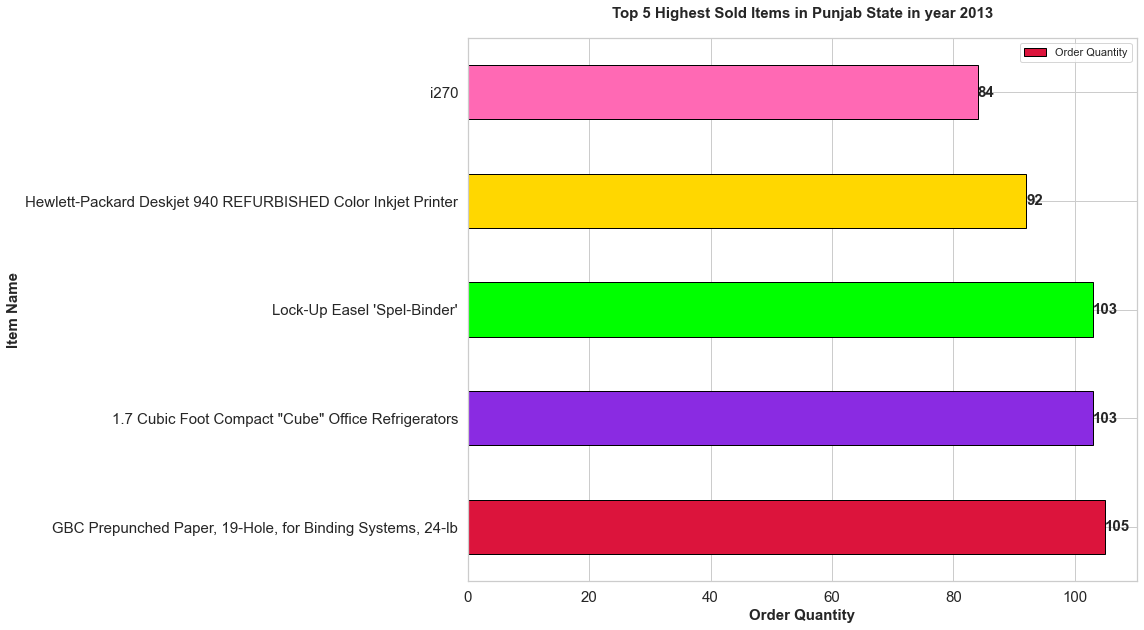

In [ ]:
ax = df8.plot(x="Item", y="Order Quantity",kind='barh',rot=360,
            figsize=(12,10),color=['crimson', 'blueviolet', 'lime','gold','hotpink'],edgecolor = "black")
ax.bar_label(ax.containers[0],fontweight ='bold', fontsize = 15)
ax.set_title("Top 5 Highest Sold Items in Punjab State in year 2013",fontweight ='bold', fontsize = 15,pad=20)
ax.set_xlabel("Order Quantity",fontweight ='bold', fontsize = 15)
ax.set_ylabel("Item Name",fontweight ='bold', fontsize = 15)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)

# Observation-
The above are the Top 5 Items that has been sold highest from Punjab State in year 2013.
The highest sold Item is GBC Prepunched paper with a quantity of 105 in Punjab state, followed by 1.7 cubic foot "Cube" office refrigerators with an order quantity of 103 and Lock-up Easel 'Spel Binder' respectively.



# What is the total profit percentage earned over the years  by selling items from Storage & Organization category?

In [ ]:
#Filtering Cities
df9=df[df['Category'].isin(['Storage & Organization'])]
df9

,Order ID,Order Priority,Order Date,Discount,Unit Price,Order Quantity,Sales,Profit,Shipping Cost,Product Base Margin,...,Customer Name,Region,State,Country,City,Ship Date,Ship Mode,year,Profit Margin %,Shipment Duration
67,90036,Not Specified,2012-05-31,0.06,65,13,794.3,590.3,35,0.8,...,Marion Nolan Kaplan,North America,Nebraska,United States of America,Bellevue,2012-06-02,Express Air,2012,74.31700868689411,2
76,50533,Not Specified,2012-05-31,0.06,65,50,"3,055.0","2,370.0",35,0.8,...,Tony Wilkins Winters,North America,New York,United States of America,New York City,2012-06-02,Express Air,2012,77.57774140752865,2
88,23297,Critical,2013-07-02,0.05,155,48,"7,068.0","4,010.6",7,0.59,...,Jose Block,AsiaPac,Tokyo,Japan,Tokyo,2013-07-04,Regular Air,2013,56.743067345783814,2
153,4705,Not Specified,2013-03-21,0.09,8,16,116.48,57.0,7,0.59,...,Anne Kenney,AsiaPac,Région Capitale Nationale,Philippines,Manila,2013-03-23,Regular Air,2013,48.93543956043956,2
183,33444,Medium,2013-10-06,0.07,15,17,237.15,119.5,8,0.57,...,Carmen Barrett,AsiaPac,Tokyo,Japan,Tokyo,2013-10-08,Regular Air,2013,50.390048492515284,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,36896,Critical,2013-11-03,0.04,167,76,"12,184.32","10,245.52",35,0.85,...,Nicole Sawyer,EMEA,Istanbul,Turkey,Istanbul,2013-11-03,Regular Air,2013,84.08774556150857,0
13365,10562,Not Specified,2010-11-11,0.03,96,34,"3,166.08","1,499.08",35,0.5,...,Marlene Wood,Latam,Nuevo Leo?n,Mexico,Monterrey,2010-11-12,Regular Air,2010,47.34814028704265,1
13371,90154,Not Specified,2010-11-11,0.03,96,9,838.08,371.08,35,0.5,...,Aaron Shaffer,North America,California,United States of America,Fairfield,2010-11-12,Regular Air,2010,44.277395952653684,1
13397,13280,High,2010-09-11,0.01,11,73,794.97,458.74,7,0.59,...,Bradley Parrott,Latam,Bahia,Brazil,Salvador,2010-09-12,Regular Air,2010,57.705322213416856,1


In [ ]:
year_profit=(df9.groupby('year')
   .agg({ 'Profit': 'sum'})
   .reset_index() )
year_profit

,year,Profit
0,2010,"232,096.89"
1,2011,"247,713.4"
2,2012,"285,935.7"
3,2013,"341,380.99"


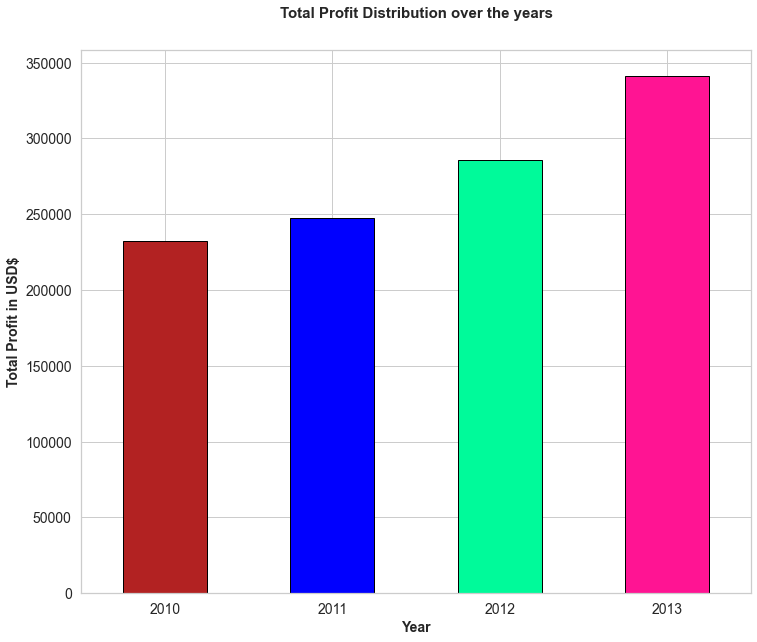

In [ ]:
year_profit.plot.bar(x="year", y="Profit",rot=0,edgecolor="black",color=['firebrick','blue','mediumspringgreen','deeppink'],
                     figsize=(12,10),legend="");
plt.title("Yearwise Profit Distribution", fontsize=16,fontweight='bold',pad=32,)

plt.xlabel("Year",fontweight ='bold', fontsize = 14)
plt.ylabel("Total Profit in USD$",fontweight ='bold', fontsize = 14)
plt.title("Total Profit Distribution over the years",fontweight ='bold', fontsize = 15,pad=32)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# print bar graph
plt.show()


# Order counts according to different order priority 

In [ ]:
#Filtering 
Priority = df1['Order Priority'].value_counts()
Priority


High             1318
Low              1268
Not Specified    1244
Medium           1207
Critical         1195
Name: Order Priority, dtype: int64

In [ ]:
# Convert the entire DataFrame
np_array= df.to_numpy()

In [ ]:
np_array

array([[4132, 'Not Specified', Timestamp('2012-05-28 00:00:00'), ...,
        2012, 31.144781144781142, 2],
       [20513, 'High', Timestamp('2013-07-07 00:00:00'), ..., 2013,
        51.664796109240555, 1],
       [36262, 'Not Specified', Timestamp('2011-07-27 00:00:00'), ...,
        2011, 58.953022236141564, 0],
       ...,
       [56581, 'High', Timestamp('2013-02-08 00:00:00'), ..., 2013,
        60.37735849056604, 3],
       [87531, 'High', Timestamp('2011-04-12 00:00:00'), ..., 2011,
        -668.8262910798121, 0],
       [87530, 'High', Timestamp('2010-02-08 00:00:00'), ..., 2010,
        58.17610062893082, 3]], dtype=object)

In [ ]:
# Printing type of arr object
print("Array is of type: ", type(np_array))
  
# Printing array dimensions (axes)
print("No. of dimensions: ", np_array.ndim)
  
# Printing shape of array
print("Shape of array: ", np_array.shape)
  
# Printing size (total number of elements) of array
print("Size of array: ", np_array.size)
  
# Printing type of elements in array
print("Array stores elements of type: ", np_array.dtype)

Array is of type:  <class 'numpy.ndarray'>
No. of dimensions:  2
Shape of array:  (13442, 26)
Size of array:  349492
Array stores elements of type:  object


In [ ]:
# Slicing array
temp = np_array[:2, ::2]
print ("Array with first 2 rows and alternate"
                    "columns(0 and 2):\n", temp)

Array with first 2 rows and alternatecolumns(0 and 2):
 [[4132 Timestamp('2012-05-28 00:00:00') 3 23.76 1 'Office Supplies'
  'Labels' 'Corporate' 'Maurice Lang' 'Sindh' 'Karachi' 'Regular Air'
  31.144781144781142]
 [20513 Timestamp('2013-07-07 00:00:00') 3 53.46 1 'Office Supplies'
  'Pens & Art Supplies' 'Corporate' 'Maurice Lang' 'Sindh' 'Karachi'
  'Express Air' 51.664796109240555]]


In [ ]:
sales = np.array(df['Sales'])
sales

array([  23.76,   53.46, 6386.  , ..., 1908.  ,  106.5 ,  477.  ])

In [ ]:
 #maximum element of array
print ("Largest element is:", sales.max())
print ("Row-wise maximum elements:",
                    sales.max())
  
# minimum element of array
print ("Column-wise minimum elements:",
                        sales.min())
  
# sum of array elements
print ("Sum of all array elements:",
                            sales.sum())
  
# cumulative sum along each row
print ("Cumulative sum along each row:\n",
                        sales.cumsum())

Largest element is: 99130.12
Row-wise maximum elements: 99130.12
Column-wise minimum elements: 0.94
Sum of all array elements: 26302263.619999997
Cumulative sum along each row:
 [2.37600000e+01 7.72200000e+01 6.46322000e+03 ... 2.63016801e+07
 2.63017866e+07 2.63022636e+07]


In [ ]:
#Sorting Country Data Column from Sales Store Traing Data
#Step1: Extracted The Column from Dataframe using np.array()

In [ ]:
country = np.array(df['Country'])
country

array(['Pakistan', 'Pakistan', 'Pakistan', ..., 'Brazil',
       'United States of America', 'United States of America'],
      dtype=object)

In [ ]:
# Sort array indices
b = np.argsort(country)
print('Sorted indices of original array->', b)
 


Sorted indices of original array-> [  333   337   336 ... 11976 11975 11980]


In [ ]:
print("Sorting Country data Alphabetically using sort:")  
  
print(np.sort(country))  

Sorting Country data Alphabetically using sort:
['Algeria' 'Algeria' 'Algeria' ... 'Viet Nam' 'Viet Nam' 'Viet Nam']


In [ ]:
UnitPrice = np.array(df['Unit Price'])
UnitPrice

array([  3,   3, 206, ..., 106, 213, 106], dtype=int64)

In [ ]:
profit = np.array(df['Profit'])
profit

array([   7.4 ,   27.62, 3764.74, ..., 1152.  , -712.3 ,  277.5 ])

In [ ]:
Selling_Price=profit-UnitPrice
Selling_Price

array([   4.4 ,   24.62, 3558.74, ..., 1046.  , -925.3 ,  171.5 ])

In [ ]:
Discount = np.array(df['Discount'])
Discount

array([0.01, 0.01, 0.  , ..., 0.1 , 0.95, 0.1 ])

In [ ]:
import numpy as np


filter_arr = Discount > 0.50

newarr = Discount[filter_arr]

print(filter_arr)
print(newarr)

[False False False ... False  True False]
[0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95
 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95
 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95
 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95
 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95
 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95
 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95]


In [ ]:
# creating the array
arr = np.array(df['Container'])
#  printing arr
print("arr = {}".format(arr))
  
#  looking for value Jumbo Box in arr and storing its index in i
i = np.where(arr == 'Jumbo Box')
print("i = {}".format(i))

arr = ['Small Box' 'Wrap Bag' 'Small Box' ... 'Medium Box' 'Jumbo Box'
 'Medium Box']
i = (array([   15,    16,    32,    33,    68,    77,    80,   200,   203,
         206,   209,   216,   217,   238,   249,   277,   287,   293,
         303,   307,   317,   322,   339,   354,   379,   385,   396,
         400,   408,   415,   422,   452,   455,   550,   557,   558,
         564,   570,   574,   598,   602,   604,   622,   653,   655,
         697,   707,   710,   718,   726,   745,   760,   776,   784,
         792,   794,   837,   848,   854,   855,   859,   866,   881,
         891,   905,   925,   935,   947,   953,   975,   994,  1005,
        1015,  1031,  1067,  1072,  1079,  1093,  1097,  1104,  1107,
        1175,  1179,  1191,  1192,  1214,  1221,  1228,  1246,  1254,
        1255,  1260,  1265,  1267,  1268,  1273,  1276,  1281,  1293,
        1300,  1321,  1331,  1342,  1405,  1427,  1443,  1454,  1473,
        1479,  1530,  1562,  1568,  1575,  1580,  1594,  1626,  1672,

In [ ]:
mean = np.mean(sales)
median = np.median(sales)
 
# measures of dispersion
min = np.amin(sales)
max = np.amax(sales)
range = np.ptp(sales)
variance = np.var(sales)
sd = np.std(sales)

print("Descriptive analysis")
print("Array =", sales)
print("Measures of Central Tendency")
print("Mean =", mean)
print("Median =", median)
print("Measures of Dispersion")
print("Minimum =", min)
print("Maximum =", max)
print("Range =", range)
print("Variance =", variance)
print("Standard Deviation =", sd)

Descriptive analysis
Array = [  23.76   53.46 6386.   ... 1908.    106.5   477.  ]
Measures of Central Tendency
Mean = 1956.7224832614193
Median = 357.2
Measures of Dispersion
Minimum = 0.94
Maximum = 99130.12
Range = 99129.18
Variance = 25303302.47541581
Standard Deviation = 5030.2388089847
